In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
# Importing some relevant libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns


In [107]:
# Reding data from file.

data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [108]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [109]:
# Checking null datas on dataset.

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [110]:
#Let's check correlation.

data.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

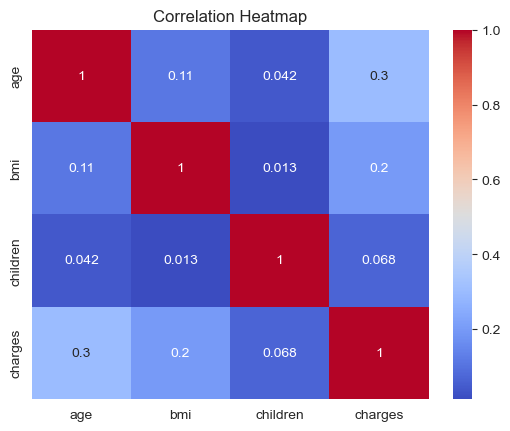

In [111]:
sns.heatmap(data.corr(), annot=True, cbar=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

○ Examine the distribution of Bmi (Body Mass Index)

Text(0.5, 1.0, 'Distribution of Bmi')

<Figure size 1200x500 with 0 Axes>

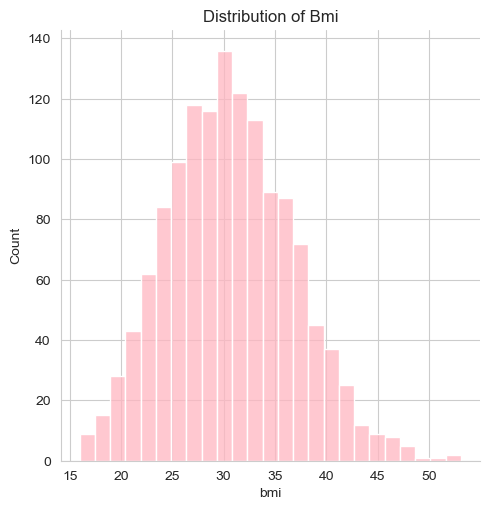

In [112]:
plt.figure(figsize=(12,5))
sns.displot(data.bmi, color='lightpink')
plt.title('Distribution of Bmi')

# We understand that bmi concentrated around 30.

○ Examine the relationship between “smoker” and “charges”

Text(0.5, 1.0, 'Smoker - Charges Relationship')

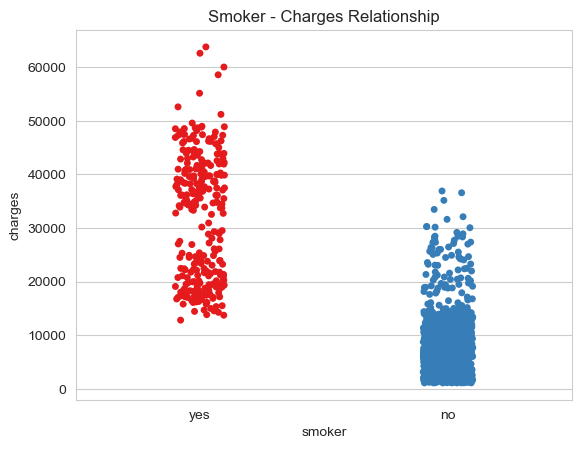

In [113]:
sns.stripplot(x=data['smoker'], y=data['charges'], palette='Set1')
plt.title('Smoker - Charges Relationship')

# Non-Smokers have less charges generally. 

○ Examine the relationship between “smoker” and “region”.

Text(0.5, 1.0, 'Smoker - Region Relationship')

<Figure size 1200x700 with 0 Axes>

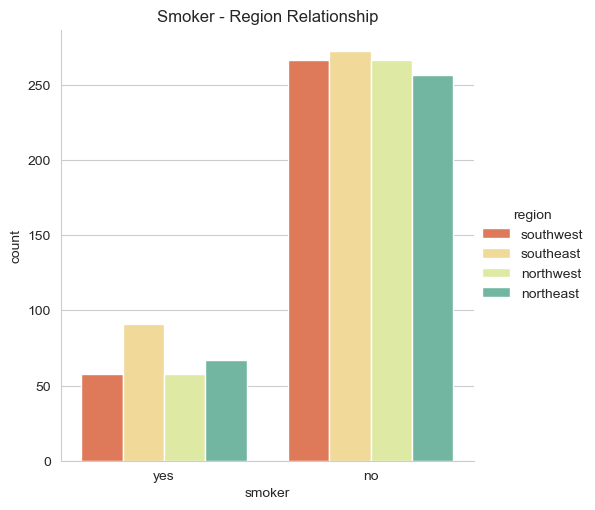

In [114]:
plt.figure(figsize = (12,7))
sns.catplot(x='smoker', kind='count', hue ='region', palette='Spectral', data = data)
plt.title('Smoker - Region Relationship')

# Southeast region has both the most smokers and the most non-smokers.

Text(0.5, 1.0, 'Smoker Percentage Distribution Chart')

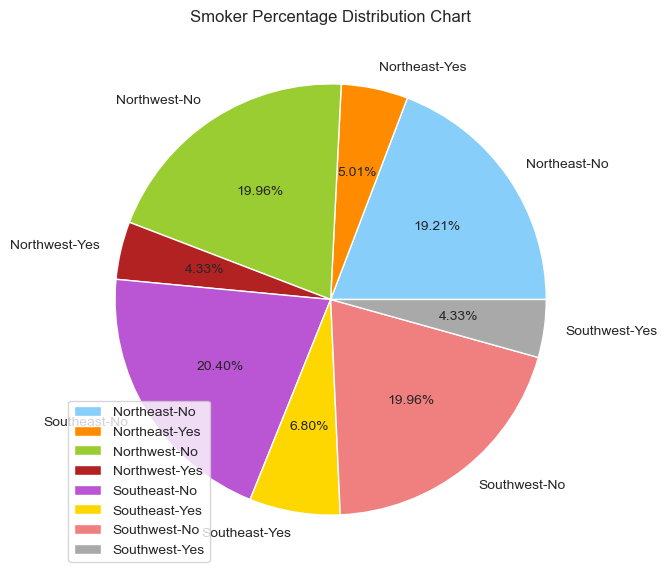

In [115]:
label = ['Northeast-No','Northeast-Yes','Northwest-No','Northwest-Yes','Southeast-No','Southeast-Yes', 'Southwest-No','Southwest-Yes']
colors = ['lightskyblue','darkorange','yellowgreen','firebrick','mediumorchid','gold','lightcoral','darkgrey']

plt.figure(figsize=(12,7))
plt.pie(x=data['smoker'].groupby(data['region']).value_counts(),labels=label, autopct='%.2f%%', colors=colors)
plt.legend(loc='lower left')
plt.title('Smoker Percentage Distribution Chart')

In [116]:
data['smoker'].groupby(data['region']).value_counts()

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

○ Examine the relationship between “bmi” and “sex”.

<AxesSubplot:xlabel='bmi', ylabel='sex'>

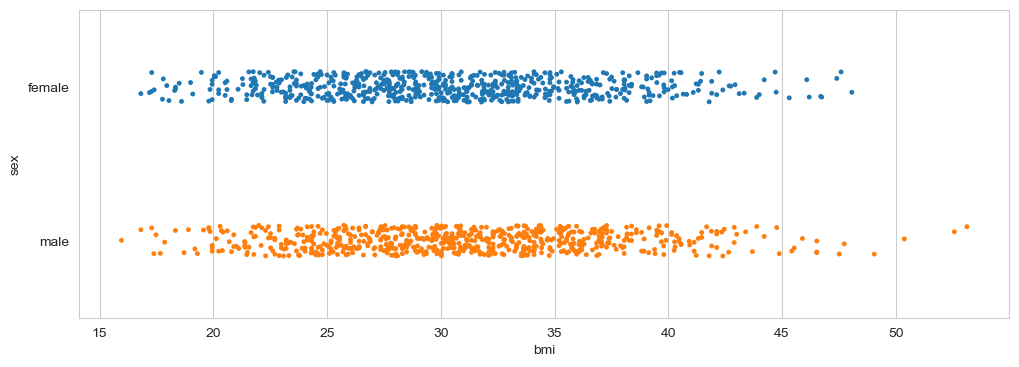

In [117]:
plt.figure(figsize=(12,4))
sns.stripplot(x=data['bmi'], y=data['sex'], size=3.5)

○ Find the "region" with the most "children".

In [118]:
data.groupby('region')[['children']].sum()

#Southeast region have the most children.

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


○ Examine the relationship between “age” and “bmi”.

Text(0.5, 1.0, 'Scatter plot of Bmi vs Age')

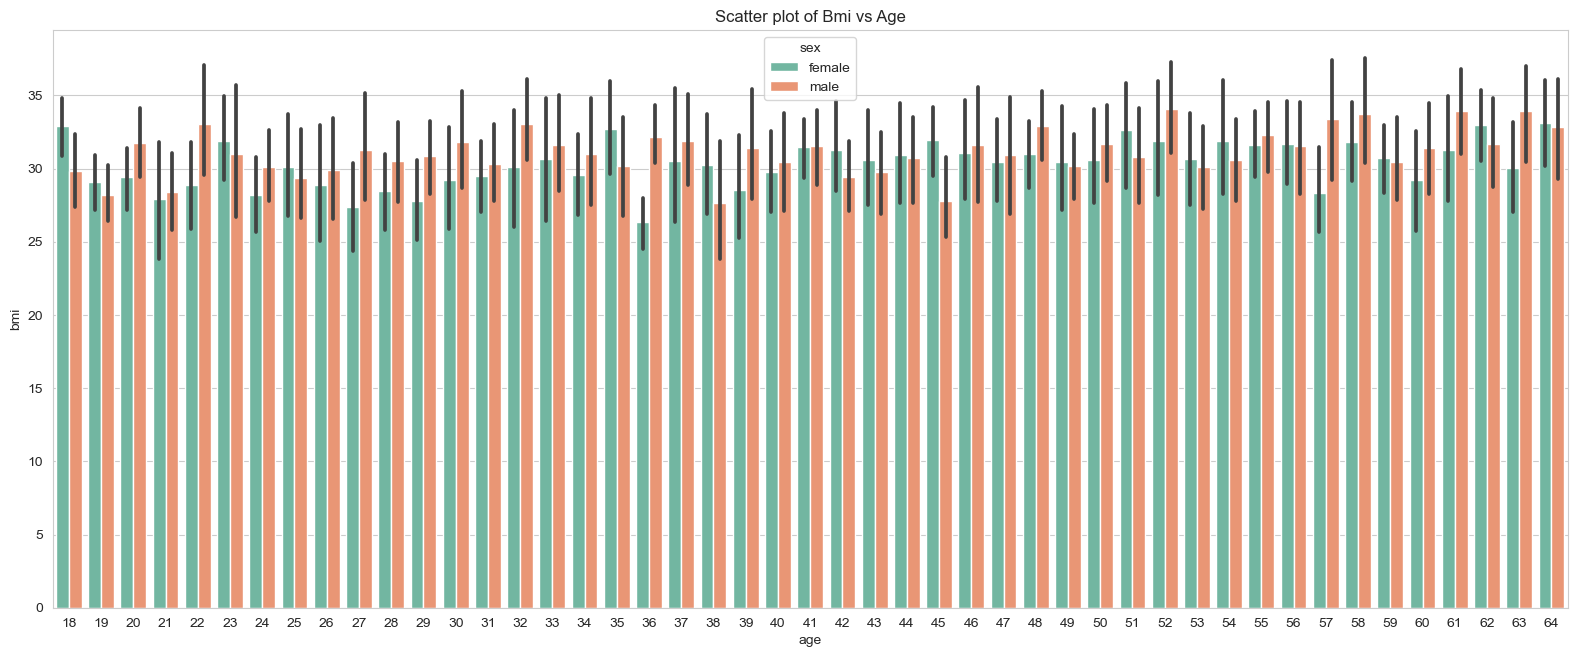

In [119]:
f = plt.figure(figsize=(43,7.5))
ax = f.add_subplot(121)
sns.barplot(x='age', y='bmi', data=data, hue='sex', ax=ax, palette='Set2')
ax.set_title('Scatter plot of Bmi vs Age')

○ Examine the relationship between “bmi” and “children”.

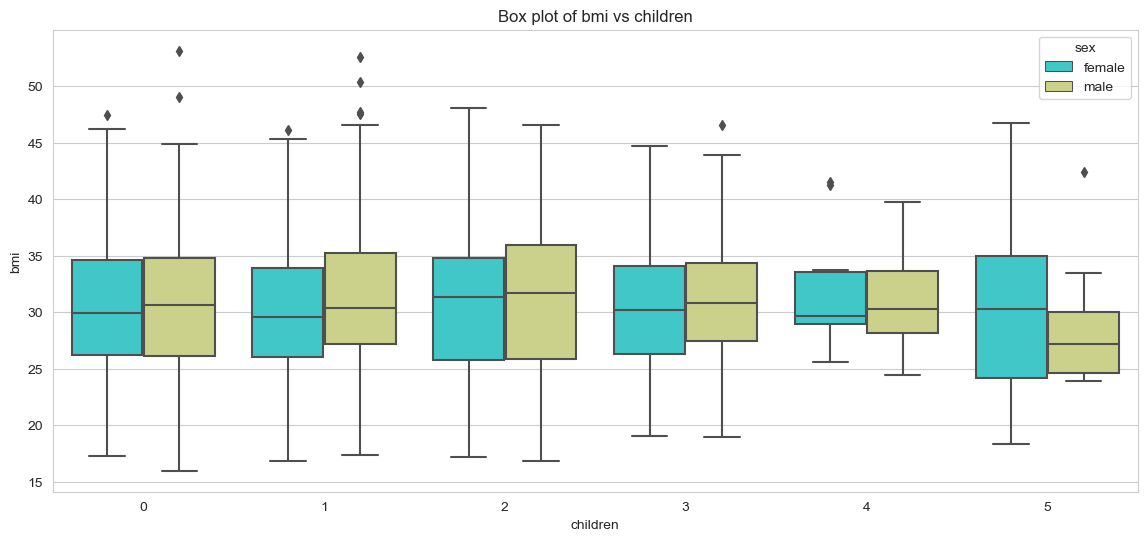

In [120]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='bmi', hue='sex', data=data, palette='rainbow')
plt.title('Box plot of bmi vs children');

○ Is there an outlier in the "bmi" variable? Please review.

<AxesSubplot:>

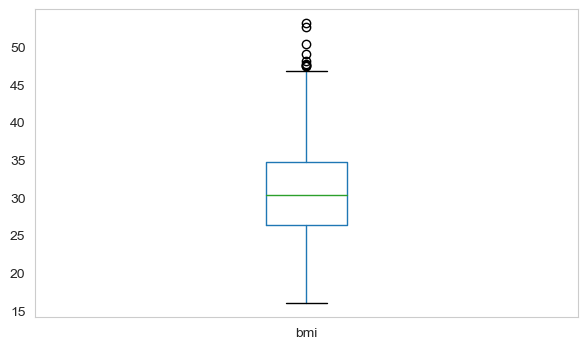

In [121]:
plt.figure(figsize=(7,4))
sns.set_style("whitegrid")
data.boxplot(column =['bmi'], grid = False)

# I tried to examine outliers with boxplot.

○ Examine the relationship between “bmi” and “charges”.

Text(0.5, 1.0, 'Reletionship between BMI-Charges')

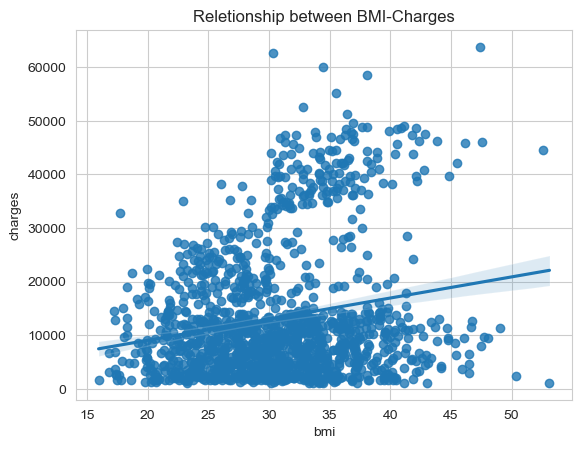

In [122]:
sns.regplot(x=data['bmi'], y=data['charges'])
plt.title('Reletionship between BMI-Charges')

○ Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

Text(0.5, 1.0, 'Region - Smoker - Bmi Relationship')

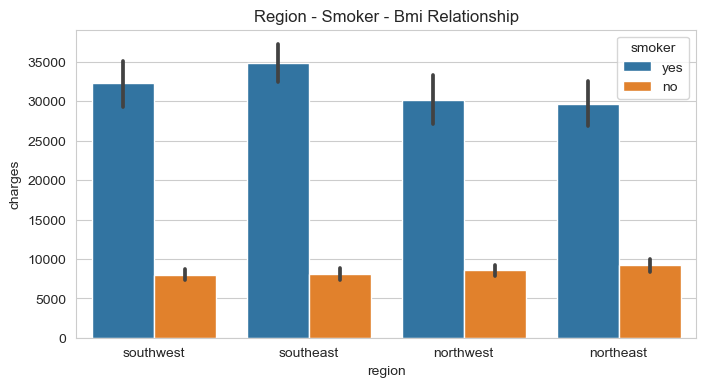

In [123]:
plt.figure(figsize=(8,4))
sns.barplot(x=data['region'], y=data['charges'], hue=data['smoker'])
plt.title('Region - Smoker - Bmi Relationship')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

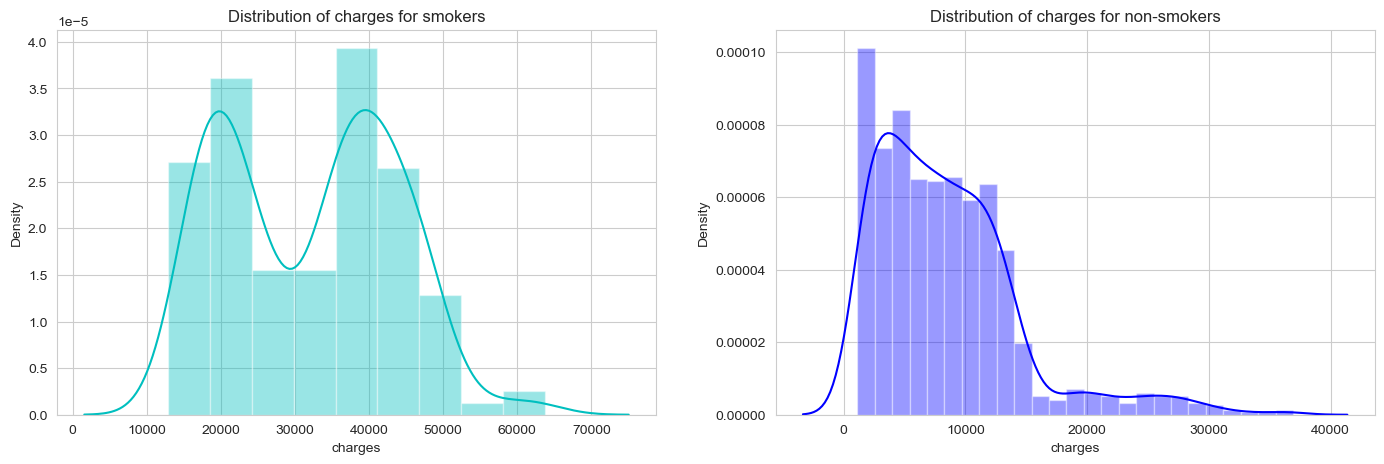

In [124]:
f = plt.figure(figsize=(17,5))

ax = f.add_subplot(121)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')


In [125]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Prepearing dataset for Machine Learning

In [126]:
# There is some categorical datas in our dataset.

from numpy import dtype
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder(dtype=int)

# Sex
# Male --> 1, Female --> 0
_sex = data.iloc[:,1:2].values
_sex[:,0] = le.fit_transform(data['sex'])
#smoker or not
# Yes --> 1, No --> 0
_smoker = data.iloc[:,4:5].values
_smoker[:,0] = le.fit_transform(data.iloc[:,4:5])

#region
_region = data.iloc[:,-2:-1].values
_region[:,0] = le.fit_transform(data.iloc[:,-2:-1])
_region = ohe.fit_transform(_region).toarray()

#others
_others = data[['age','bmi','children']]
_charges = data['charges']

In [127]:
# Returning np.arrays to pd.DataFrames
df_sex = pd.DataFrame(data=_sex, index=range(len(data)), columns=['sex'])
df_smoker = pd.DataFrame(data=_smoker, index=range(len(data)), columns=['smoker'])
df_region = pd.DataFrame(data=_region, index=range(len(data)), columns=['northeast_region','nothwest_region','southeast_region','southwest_region'])

#Concatinf dataframes
nw_df = pd.concat([_others, df_sex, df_smoker, df_region, _charges], axis=1)
display(nw_df.head())

,age,bmi,children,sex,smoker,northeast_region,nothwest_region,southeast_region,southwest_region,charges
0,19,27.900,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,0,1,0,4449.46200
3,33,22.705,0,1,0,0,1,0,0,21984.47061
4,32,28.880,0,1,0,0,1,0,0,3866.85520


In [128]:
Y = nw_df['charges']
X = nw_df.drop('charges', axis=1)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [130]:
RegName = []
RegScores = []
RegMSE = []

### Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33, random_state = 0)

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_pred, y_test)

RegName.append('Multiple Linear Regression')
RegScores.append(r2)
RegMSE.append(mse)


print('Multiple Linear Regresiion R2:', r2)


Multiple Linear Regresiion R2: 0.7871002363403499


### Ridge Regression

In [132]:
from sklearn.linear_model import Ridge

rr = Ridge()
rr.fit(x_train, y_train)
rr_pred = rr.predict(x_test)

r2 = r2_score(y_test, rr_pred)
mse = mean_squared_error(rr_pred, y_test)

RegName.append('Ridge Regression')
RegScores.append(r2)
RegMSE.append(mse)

print('Ridge Regression R2:', r2)


Ridge Regression R2: 0.786525571245398


### Support Vector Regression

In [133]:
# Scaling
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x_train = sc_x.fit_transform(x_train)
sc_x_test = sc_x.transform(x_test)

sc_y = StandardScaler()
sc_y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
sc_y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [134]:
from sklearn.svm import SVR
from sympy import dsolve

svr_reg = SVR(kernel='rbf')
svr_reg.fit(sc_x_train, sc_y_train)

svr_pred = svr_reg.predict(sc_x_test)

r2 = r2_score(sc_y_test,svr_pred)
mse = mean_squared_error(svr_pred, sc_y_test)

RegName.append('SVR')
RegScores.append(r2)
RegMSE.append(mse)

print('Support Vector Regression R2:', r2)


Support Vector Regression R2: 0.8689229307794116


### Decision Tree

In [135]:
from sklearn.tree import DecisionTreeRegressor

dt_reg =DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train, y_train)

dt_pred = dt_reg.predict(x_test)

r2 = r2_score(y_test,dt_pred)
mse = mean_squared_error(dt_pred, y_test)

RegName.append('Decision Tree')
RegScores.append(r2)
RegMSE.append(mse)

print('Decision Tree Regression R2:', r2)

Decision Tree Regression R2: 0.720226757067397


### Random Forest

In [136]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(x_train, y_train)

rf_pred = rf_reg.predict(x_test)

r2 = r2_score(y_test,rf_pred)
mse = mean_squared_error(rf_pred, y_test)

RegName.append('Random Forest')
RegScores.append(r2)
RegMSE.append(mse)

print('Random Forest Regression R2:', r2)

Random Forest Regression R2: 0.8627131704929968


### KNN

In [137]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski')
knn.fit(x_train, y_train)

knn_pred = knn.predict(x_test)

r2 = r2_score(y_test, knn_pred)
mse = mean_squared_error(knn_pred, y_test)

RegName.append('KNN')
RegScores.append(r2)
RegMSE.append(mse)

print('KNN R2:', r2)


KNN R2: 0.20772060981026763


In [138]:
results_df = pd.DataFrame({'Regressor':RegName, 'Score':RegScores, 'MSE':RegMSE})
results_df.sort_values(by=['Score'], ascending=False).style.highlight_max(subset = ['Score','MSE'], color='olive', axis=0)

,Regressor,Score,MSE
2,SVR,0.868923,0.150188
4,Random Forest,0.862713,21987371.814201
0,Multiple Linear Regression,0.787100,34097271.235341
1,Ridge Regression,0.786526,34189307.559268
3,Decision Tree,0.720227,44807490.551818
5,KNN,0.207721,126888657.822358


#### SVR gives us a best results in this case.